# Brazil 1 - 2 Belgium World Cup 2018 QF

[Scatter mlpsoccer](https://mplsoccer.readthedocs.io/en/latest/gallery/pitch_plots/plot_scatter.html)

In [1]:
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from mplsoccer import VerticalPitch, Pitch
from mplsoccer.cm import create_transparent_cmap
from mplsoccer.scatterutils import arrowhead_marker
from mplsoccer.statsbomb import read_event, EVENT_SLUG
from mplsoccer.utils import FontManager
from statsbombpy import sb

In [2]:
matches = sb.matches(43,3)

credentials were not supplied. open data access only


In [3]:
be_matches = matches[(matches['home_team'] == 'Belgium') | (matches['away_team'] == 'Belgium')]
be_matches.head()

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,competition_stage,stadium,referee,data_version,shot_fidelity_version,xy_fidelity_version
3,7536,2018-06-18,17:00:00.000,International - FIFA World Cup,2018,Belgium,Panama,3,0,available,scheduled,2021-12-06T22:40:10.487423,2021-06-13T16:17:31.694,1,Group Stage,Olimpiyskiy Stadion Fisht,Janny Sikazwe,1.0.2,None,None
14,8650,2018-07-06,20:00:00.000,International - FIFA World Cup,2018,Brazil,Belgium,1,2,available,scheduled,2020-07-29T05:00,2021-06-13T16:17:31.694,5,Quarter-finals,Kazan'' Arena,Milorad Mažić,1.0.2,None,None
29,7584,2018-07-02,20:00:00.000,International - FIFA World Cup,2018,Belgium,Japan,3,2,available,scheduled,2020-07-29T05:00,2021-06-13T16:17:31.694,4,Round of 16,Rostov Arena,Malang Diedhiou,1.0.2,None,None
36,7552,2018-06-23,14:00:00.000,International - FIFA World Cup,2018,Belgium,Tunisia,5,2,available,scheduled,2020-07-29T05:00,2021-06-13T16:17:31.694,2,Group Stage,Otkrytiye Arena (Moskva),Jair Marrufo,1.0.2,None,None
50,7570,2018-06-28,20:00:00.000,International - FIFA World Cup,2018,England,Belgium,0,1,available,scheduled,2020-07-29T05:00,2021-06-13T16:17:31.694,3,Group Stage,Stadion Kaliningrad,Damir Skomina,1.0.2,None,None


In [4]:
brz_bel = sb.events(8650)

credentials were not supplied. open data access only


In [5]:
brz_bel.columns

Index(['ball_receipt_outcome', 'ball_recovery_recovery_failure',
       'block_deflection', 'carry_end_location', 'counterpress',
       'dribble_nutmeg', 'dribble_outcome', 'dribble_overrun', 'duel_outcome',
       'duel_type', 'duration', 'foul_committed_advantage',
       'foul_committed_card', 'foul_committed_offensive',
       'foul_committed_type', 'foul_won_advantage', 'foul_won_defensive',
       'goalkeeper_body_part', 'goalkeeper_end_location', 'goalkeeper_outcome',
       'goalkeeper_position', 'goalkeeper_technique', 'goalkeeper_type', 'id',
       'index', 'interception_outcome', 'location', 'match_id', 'minute',
       'pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id',
       'pass_backheel', 'pass_body_part', 'pass_cross', 'pass_cut_back',
       'pass_deflected', 'pass_end_location', 'pass_goal_assist',
       'pass_height', 'pass_length', 'pass_outcome', 'pass_recipient',
       'pass_shot_assist', 'pass_switch', 'pass_technique',
       'pass_through_ball', 'pa

In [6]:
shots = brz_bel[['team','minute', 'player', 'shot_end_location', 'shot_outcome', 'shot_statsbomb_xg', 'shot_type']]

In [7]:
shots = shots.dropna()

In [8]:
def get_numeric_shots(df):
    
    df['x'] = [i[0] for i in df['shot_end_location'].values]
    df['y'] = [i[1] for i in df['shot_end_location'].values] 
    df = df.drop(['shot_end_location'], axis=1)
    
    return df

shots = get_numeric_shots(shots)

In [9]:
def scale_shots(df):
    
    df['x'] = df['x']*.91
    df['y'] = df['y']*1.36
    
    return df

In [10]:
be_shots = shots[shots['team'] == 'Belgium']

In [11]:
be_shots = scale_shots(be_shots)

<ipython-input-9-bb4ef0a2b19b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['x'] = df['x']*.91
<ipython-input-9-bb4ef0a2b19b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = df['y']*1.36


In [12]:
be_shots

,team,minute,player,shot_outcome,shot_statsbomb_xg,shot_type,x,y
3244,Belgium,1,Kevin De Bruyne,Off T,0.014494,Open Play,109.20,47.328
3246,Belgium,7,Eden Hazard,Blocked,0.069560,Open Play,99.19,42.160
3247,Belgium,7,Nacer Chadli,Off T,0.012855,Open Play,109.20,46.784
3250,Belgium,12,Marouane Fellaini-Bakkioui,Blocked,0.061184,Open Play,91.91,53.040
3256,Belgium,30,Kevin De Bruyne,Goal,0.029207,Open Play,109.20,49.776
3259,Belgium,40,Kevin De Bruyne,Saved,0.038126,Free Kick,109.20,51.408
3260,Belgium,41,Vincent Kompany,Saved,0.026051,Open Play,109.20,49.232
3263,Belgium,61,Eden Hazard,Off T,0.123731,Open Play,109.20,62.016


In [13]:
bz_shots = shots[shots['team'] == 'Brazil']

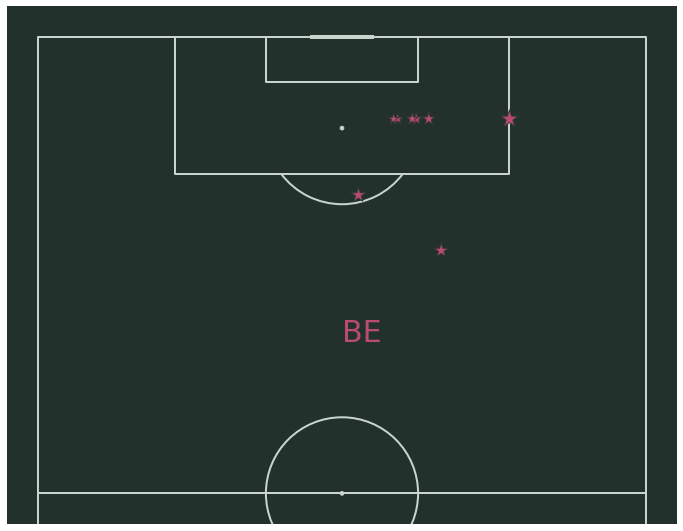

In [14]:
fig, ax = plt.subplots(figsize=(12,10))

pitch = VerticalPitch(pitch_type='statsbomb', orientation='vertical', half=True,
              pitch_color='#22312b', line_color='#c7d5cc', figsize=(13, 8),
              constrained_layout=False, tight_layout=True)

sc = pitch.scatter(be_shots.x, be_shots.y,
                   # size varies between 100 and 1000 (points squared)
                   s=(be_shots.shot_statsbomb_xg * 1900) + 100,
                   c='#b94b75',  # color for scatter in hex format
                   cmap='plasma_r',
                   edgecolors='#383838',  # give the markers a charcoal border
                   # for other markers types see: https://matplotlib.org/api/markers_api.html
                   marker='*',
                   ax=ax)

txt = ax.text(x=40, y=80, s='BE',
              size=30,
              # here i am using a downloaded font from google fonts instead of passing a fontdict
                color='#b94b75',
         )

pitch.draw(ax=ax)

In [15]:
bz_shots = scale_shots(bz_shots)

<ipython-input-9-bb4ef0a2b19b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['x'] = df['x']*.91
<ipython-input-9-bb4ef0a2b19b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = df['y']*1.36


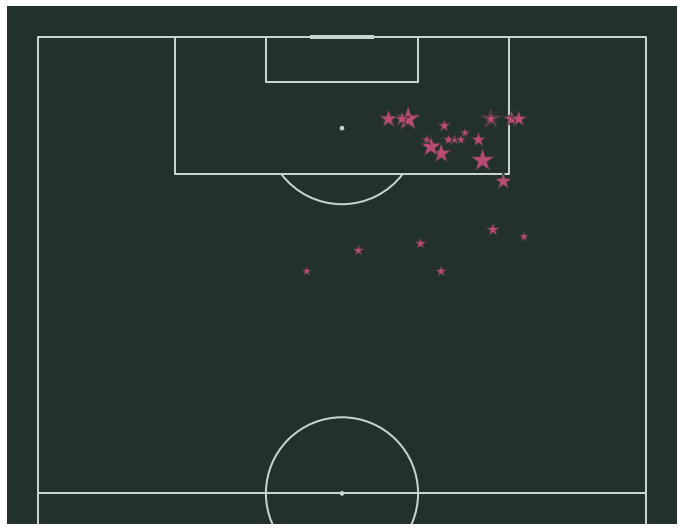

In [16]:
fig, ax = plt.subplots(figsize=(12,10))

pitch = VerticalPitch(pitch_type='statsbomb', orientation='vertical', half=True,
              pitch_color='#22312b', line_color='#c7d5cc', figsize=(13, 8),
              constrained_layout=False, tight_layout=True)

sc = pitch.scatter(bz_shots.x, bz_shots.y,
                   # size varies between 100 and 1000 (points squared)
                   s=(bz_shots.shot_statsbomb_xg * 1900) + 100,
                   c='#b94b75',  # color for scatter in hex format
                   cmap='plasma_r',
                   edgecolors='#383838',  # give the markers a charcoal border
                   # for other markers types see: https://matplotlib.org/api/markers_api.html
                   marker='*',
                   ax=ax)

txt = ax.text(x=40, y=80, s='',
              size=30,
              # here i am using a downloaded font from google fonts instead of passing a fontdict
                color='#b94b75',
         )

pitch.draw(ax=ax)

Weird result. Data? Rescaling?

In [17]:
bz_shots

,team,minute,player,shot_outcome,shot_statsbomb_xg,shot_type,x,y
3245,Brazil,7,Thiago Emiliano da Silva,Post,0.310511,Open Play,109.20,48.688
3248,Brazil,9,José Paulo Bezzera Maciel Júnior,Blocked,0.135887,Open Play,101.01,61.200
3249,Brazil,9,José Paulo Bezzera Maciel Júnior,Wayward,0.193040,Open Play,104.65,53.040
3251,Brazil,14,Gabriel Fernando de Jesus,Blocked,0.230266,Open Play,105.56,51.680
3252,Brazil,18,Philippe Coutinho Correia,Saved,0.049996,Open Play,108.29,53.448
3253,Brazil,25,Marcelo Vieira da Silva Júnior,Saved,0.013631,Open Play,106.47,51.136
3254,Brazil,29,Fernando Luiz Rosa,Blocked,0.062281,Open Play,94.64,59.840
3255,Brazil,29,Neymar da Silva Santos Junior,Blocked,0.014484,Open Play,89.18,35.360
3257,Brazil,35,Gabriel Fernando de Jesus,Off T,0.122675,Open Play,109.20,62.288
3258,Brazil,36,Philippe Coutinho Correia,Saved,0.016153,Open Play,107.38,56.168
